<a href="https://www.kaggle.com/code/abdulazizahmedalamri/task6-wetaan-final-version?scriptVersionId=187859141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


In [2]:
df = pd.read_csv("/kaggle/input/sample-sales-data/sales_data_sample.csv", encoding = 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.describe


<bound method NDFrame.describe of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  

In [5]:
print(df.isnull().sum())


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [6]:
print(df.dtypes)


ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [7]:
print(df['CITY'].value_counts())


CITY
Madrid         304
San Rafael     180
NYC            152
Singapore       79
Paris           70
              ... 
Graz            15
Los Angeles     14
Munich          14
Burbank         13
Charleroi        8
Name: count, Length: 73, dtype: int64


In [8]:
print(df['STATE'].value_counts())


STATE
CA               416
MA               190
NY               178
NSW               92
Victoria          78
PA                75
CT                61
BC                48
NH                34
Tokyo             32
NV                29
Isle of Wight     26
Quebec            22
NJ                21
Osaka             20
Queensland        15
Name: count, dtype: int64


In [9]:
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import time


cities = df['CITY'].unique()

geolocator = Nominatim(user_agent="geoapiExercises")
location_dict = {}

for city in cities:
    try:
        location = geolocator.geocode(city)
        if location:
            location_dict[city] = (location.latitude, location.longitude)
        else:
            location_dict[city] = (None, None)
        time.sleep(1)  # الانتظار لتجنب الوصول إلى حد API
    except Exception as e:
        location_dict[city] = (None, None)
        print(f"Could not get coordinates for {city}: {e}")

df['latitude'] = df['CITY'].apply(lambda x: location_dict[x][0])
df['longitude'] = df['CITY'].apply(lambda x: location_dict[x][1])

df = df.dropna(subset=['latitude', 'longitude'])

m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

m.save("heatmap.html")

m


In [10]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,latitude,longitude
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,40.712728,-74.006015
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,49.257789,4.031926
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,48.853495,2.348391
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,34.147651,-118.144155
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,37.779259,-122.419329


In [11]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2437
CITY                   0
STATE               1428
POSTALCODE            76
COUNTRY                0
TERRITORY           1048
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
latitude               0
longitude              0
dtype: int64

In [12]:
#drop the columns that have missings value and it is unnecessary to keep them
df.dropna(axis=1, inplace=True)

/tmp/ipykernel_33/972322771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


In [13]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
latitude            0
longitude           0
dtype: int64

In [14]:
# There are also some other columns to drop that are unneeded for our analysis

columns_to_drop = [
    'PHONE', 'ADDRESSLINE1',                     #Detailed address not necessary
    'CONTACTLASTNAME', 'CONTACTFIRSTNAME'        #Personal details not needed.
]


df.drop(columns=columns_to_drop, inplace=True)

/tmp/ipykernel_33/3416219488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [15]:
df.shape

(2739, 19)

In [16]:
# Save DataFrame to CSV
df.to_csv('cleaned_sales_data.csv', index=False)

In [17]:
df2=pd.read_csv("/kaggle/working/cleaned_sales_data.csv")
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,latitude,longitude
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small,40.712728,-74.006015
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small,49.257789,4.031926
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium,48.853495,2.348391
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium,34.147651,-118.144155
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium,37.779259,-122.419329


In [18]:
df2.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
COUNTRY             object
DEALSIZE            object
latitude           float64
longitude          float64
dtype: object

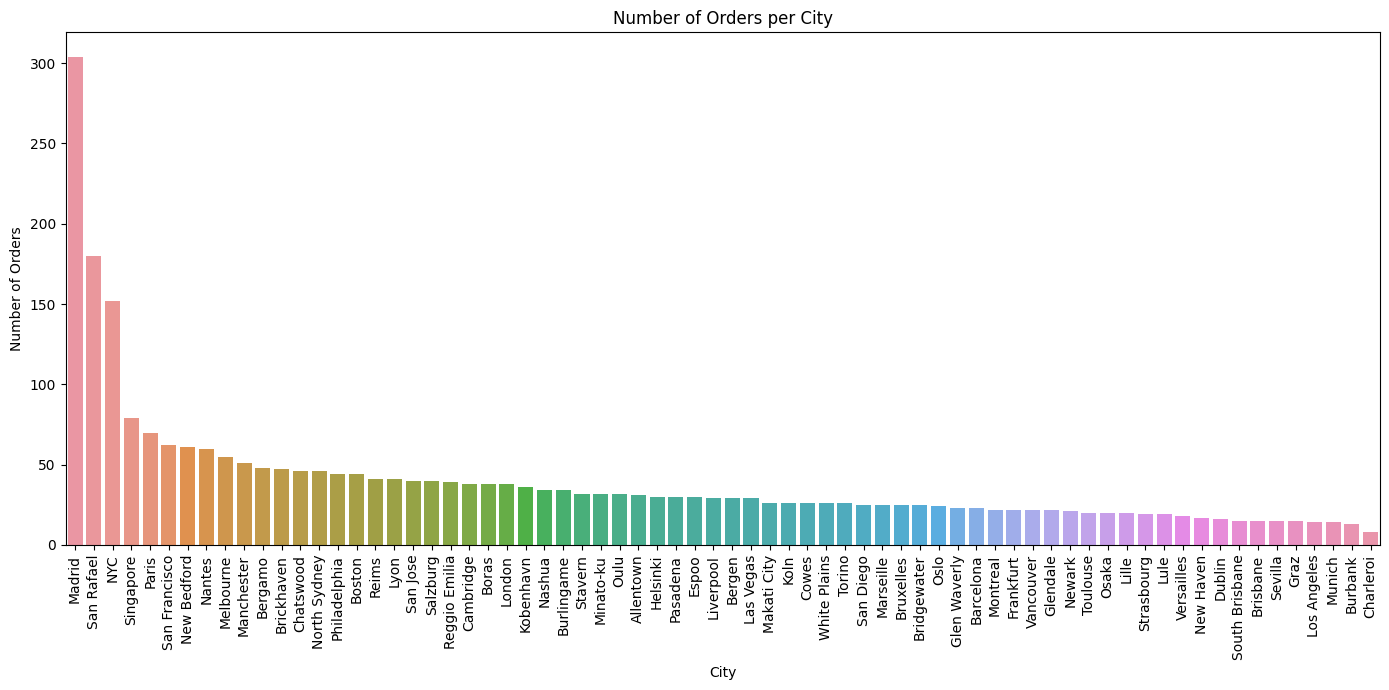

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# شارت عمودي لعدد الطلبات لكل مدينة
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='CITY', order=df['CITY'].value_counts().index)
plt.title('Number of Orders per City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [20]:
print(df['CUSTOMERNAME'].value_counts())

CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: count, Length: 89, dtype: int64
